<a href="https://colab.research.google.com/github/skaty5678/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_SANJEEV_KUMAR_THAKUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### **id** - a unique identifier for each trip
* #### **vendor_id** - a code indicating the provider associated with the trip record
* #### **pickup_datetime** - date and time when the meter was engaged
* #### **dropoff_datetime** - date and time when the meter was disengaged
* #### **passenger_count** - the number of passengers in the vehicle (driver entered value)
* #### **pickup_longitude** - the longitude where the meter was engaged
* #### **pickup_latitude** - the latitude where the meter was engaged
* #### **dropoff_longitude** - the longitude where the meter was disengaged
* #### **dropoff_latitude** - the latitude where the meter was disengaged
* #### **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### **trip_duration** - duration of the trip in seconds

#**Why is it important ?**

##**Predicting the duration of a taxi trip is very important since a user would always like to know precisely how much time it would require of him to travel from one place to another. Given the rising popularity of app-based taxi usage through common vendors like Ola and Uber, competitive pricing has to be offered to ensure users choose them. Prediction of duration and price of trips can help users to plan their trips properly, thus keeping potential margins for traffic congestions.**

#<b>Setting the stage for our Dataset</b>


In [21]:
#Bringing in all the important libraries required for a smooth data visualization.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
#the raw data

raw_df = pd.read_csv('/content/drive/MyDrive/Copy of NYC Taxi Data.csv')

In [27]:
raw_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [28]:
raw_df.shape

(1458644, 11)

In [29]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [30]:
raw_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [31]:
#dealing with the null values
def missing_values(df):

  #total of missing values for each column
  total_missing_value = df.isna().sum()

  #percentage of missing values 
  percent_missing_value = total_missing_value*100/len(df)

  #making a table of the above results
  table = pd.concat([total_missing_value,percent_missing_value],axis = 1)

  #renaming the columns
  table.rename(columns = {0:'missing values',1:'percent of missing values'},inplace = True)

  #sorting the table in decreasing order by percentage of missing values
  missing_values_table = table.sort_values('percent of missing values',ascending = False).round(1)

  return missing_values_table

In [32]:
missing_values(raw_df)

,missing values,percent of missing values
id,0,0.0
vendor_id,0,0.0
pickup_datetime,0,0.0
dropoff_datetime,0,0.0
passenger_count,0,0.0
pickup_longitude,0,0.0
pickup_latitude,0,0.0
dropoff_longitude,0,0.0
dropoff_latitude,0,0.0
store_and_fwd_flag,0,0.0


In [33]:
#checking for numeric columns
numeric_features = raw_df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

In [34]:
#checking for categorical columns
categorical_features = raw_df.describe(include=['object','category']).columns
categorical_features

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'], dtype='object')

#<b>Data preparation for Exploratory Data Analysis and Visualizations.</b>

##Before we start running our model on the dataset. First we will try to interpret what the data is trying to convey to us using EDA and graphical visualisations.

##**Univariate Analysis**




In [35]:
df = raw_df.copy()

In [36]:
#converting pickup_datetime and dropoff_datetime from object type to datetime to extract useful information from them
df[["pickup_datetime", "dropoff_datetime"]] = df[["pickup_datetime", "dropoff_datetime"]].apply(pd.to_datetime)


In [71]:
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

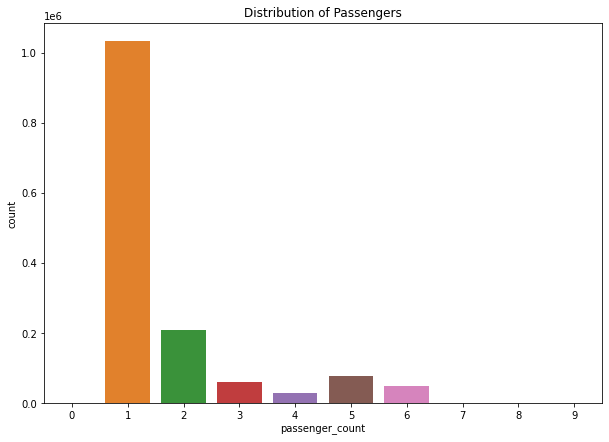

In [70]:
plt.figure(figsize=(10,7))
sns.countplot(df['passenger_count'])
plt.title('Distribution of Passengers')
plt.show()

###We can see that most of the times the cab is availed by 1 or 2 passengers only. Very rarely it can be seen people travelling in a group.


In [38]:
#Extracting information from pickup_datetime about the month, week and hour of pickup

df['month'] = df.pickup_datetime.dt.month
df['pickup_day']=df.pickup_datetime.dt.day_name()
df['pickup_hour'] = df.pickup_datetime.dt.hour

In [51]:
#Extracting information from dropoff_datetime about the month, week and hour of dropoff

df['dropff_day']=df.dropoff_datetime.dt.day_name()
df['dropff_hour'] = df.dropoff_datetime.dt.hour

In [39]:
df['pickup_day'].value_counts()


Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [52]:
df['dropff_day'].value_counts()


Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropff_day, dtype: int64

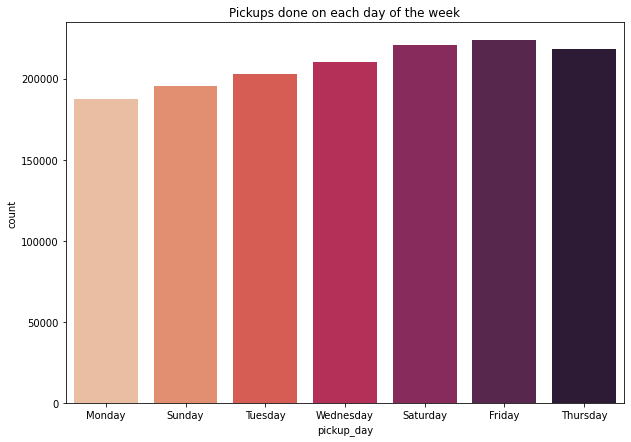

In [68]:
plt.figure(figsize=(10,7))
sns.countplot(x='pickup_day',data=df,palette='rocket_r')
plt.title('Pickups done on each day of the week')
plt.show()

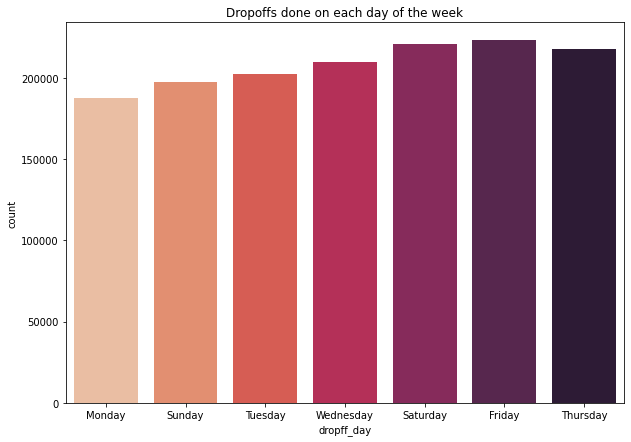

In [69]:
plt.figure(figsize=(10,7))
sns.countplot(x='dropff_day',data=df,palette='rocket_r')
plt.title('Dropoffs done on each day of the week')
plt.show()

###Most number of pickups have happened on Friday while Monday has witnessed the least number of pickups. And same is the case when it comes for dropoffs.

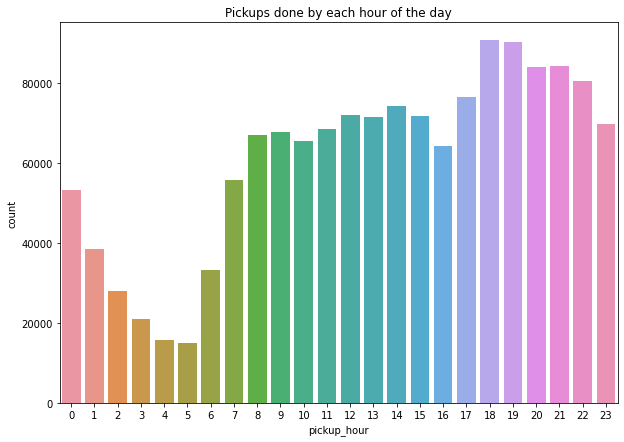

In [50]:
plt.figure(figsize=(10,7))
sns.countplot(x='pickup_hour',data=df)
plt.title('Pickups done by each hour of the day')
plt.show()

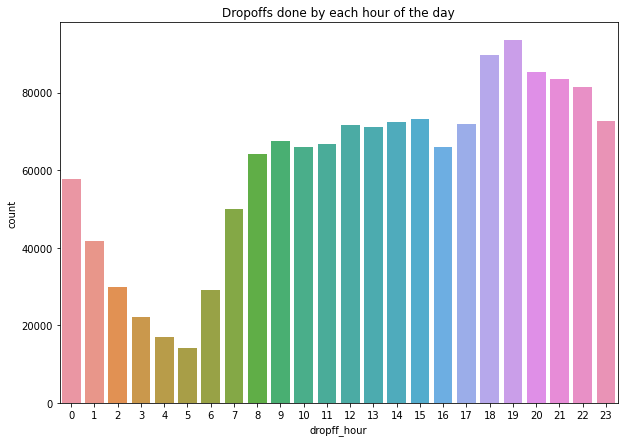

In [54]:
plt.figure(figsize=(10,7))
sns.countplot(x='dropff_hour',data=df)
plt.title('Dropoffs done by each hour of the day')
plt.show()

###We can observe that most pickups and drops happen round the time between 3 PM to 9 PM . While the least number of drops and pickups occur between 2 AM to 7 AM. A possible reason for this could be that most number of office going people travel via metro or whatever public transport service is there in the morning for travelling but when heading back from office people are actually very tired to travel in a public transport so they prefer cabs.


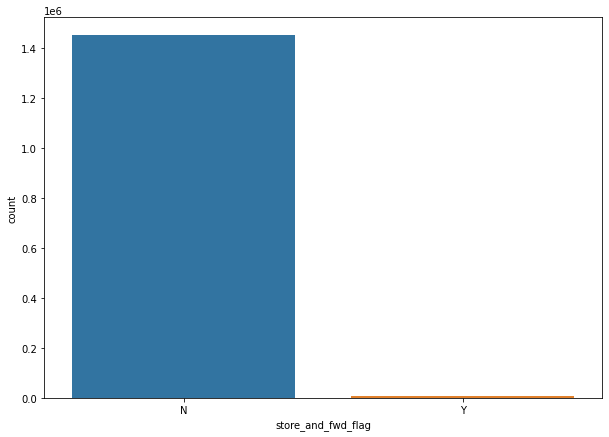

In [58]:
plt.figure(figsize=(10,7))
sns.countplot(x='store_and_fwd_flag',data=df)
plt.show()

###We can see that there are a minimal number of trips that were stored before forwarding.



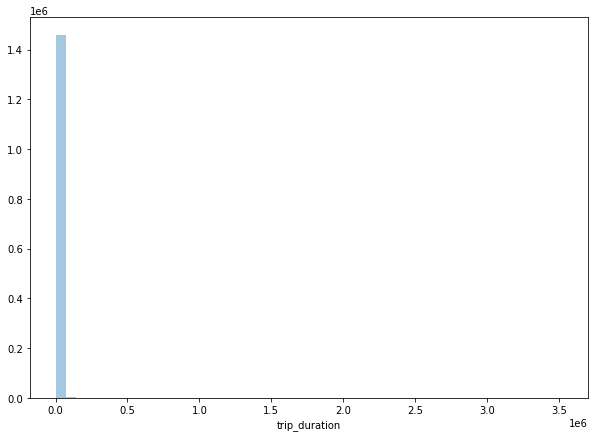

In [64]:
plt.figure(figsize=(10,7))
sns.distplot(df['trip_duration'],kde=False)


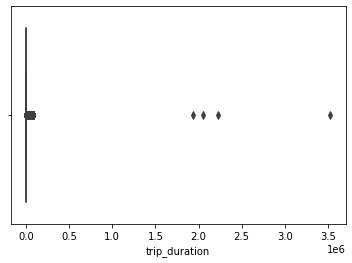

In [65]:
sns.boxplot(df['trip_duration'], orient='horizontal')

###This histogram and boxplot show that there is extreme right skewness and hence there are some outliers. We will deal with these outliers later.

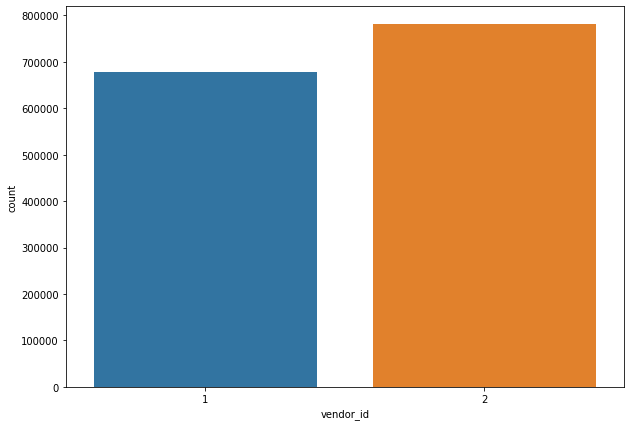

In [66]:
plt.figure(figsize=(10,7))
sns.countplot(x='vendor_id',data=df)
plt.show()

###Not that huge a difference can be observed in case of vendors.

##**Bivariate Analysis**